In [129]:
%reset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [174]:
class EDA:
    def __init__(self, df):
        self.df = df
        self.corr = pd.DataFrame()
        self.set_fig_settings()
        
    def set_fig_settings(self):
        matplotlib.rcParams.update({'font.size': 15})
        
    def boxplots(self, columns):
        fig, axes = plt.subplots(len(columns), 1, figsize=(10, 20))
        fig.tight_layout()    
        for index, col in enumerate(columns):
            sns.boxplot(x=self.df[col], ax=axes[index])
            
    def get_corr(self, feature_columns, target_col):
        self.corr = pd.DataFrame(self.df[feature_columns].corrwith(self.df[target_col]))
        self.corr = self.corr.sort_values(0, ascending=False)
        return self.corr
        
    def corr_heatmap(self, feature_columns, target_col):
        correlations = self.get_corr(feature_columns, target_col)
        sns.heatmap(correlations, annot=True)
            
    def clean_zero_values(self, columns):
        for col in columns:
            self.df = self.df.drop(self.df.loc[(df[col] == 0)].index)
    

In [175]:
df = pd.read_csv("train_c.csv")
eda = EDA(df)

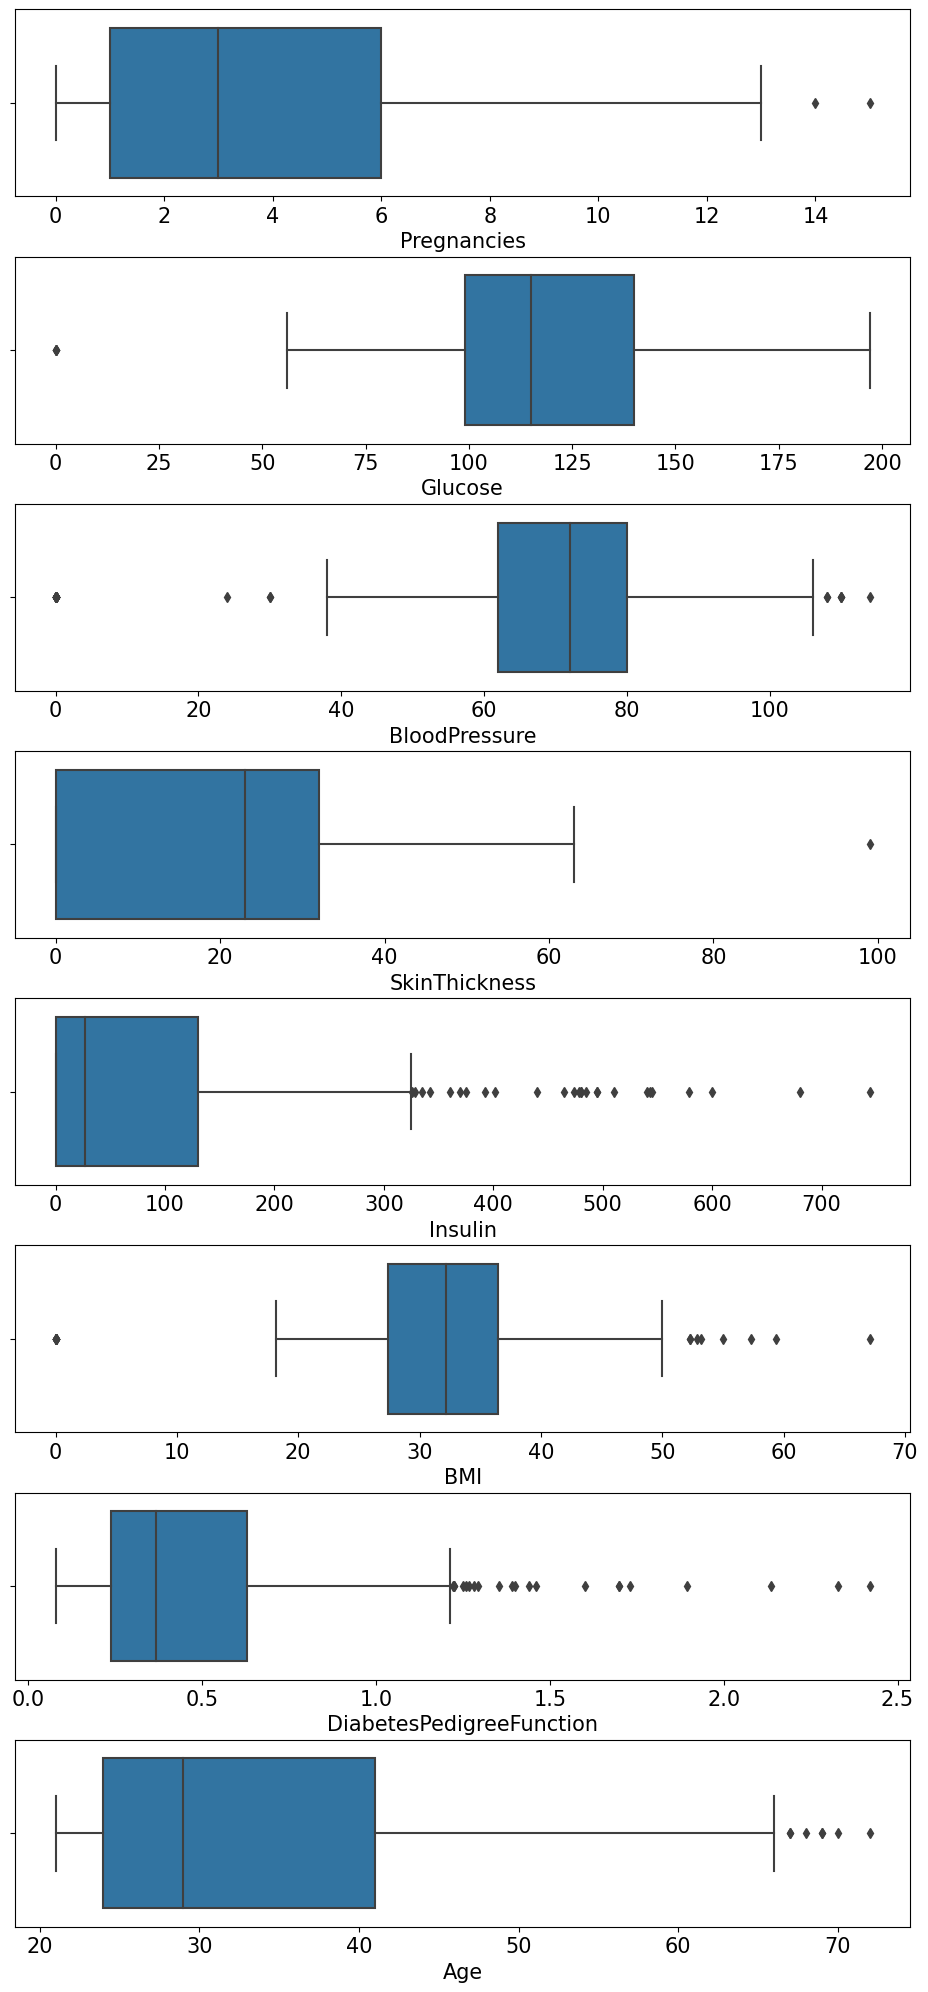

In [176]:
eda.boxplots(eda.df.columns[1:-1])
eda.clean_zero_values(['Glucose', 'BMI', 'BloodPressure'])

## Voldoet de data aan de voorwaarden voor machine learning?
De data voldoet aan de voorwaarden aangezien de data:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- In een dataframe staat<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Geen lege waardes bevat<br>
&nbsp;&nbsp;&nbsp;&nbsp;- In numerieke waardes is beschreven<br>

Echter vinden wij dat de data nog schoongemaakt kan worden, dit vinden wij omdat in de boxplots te zien valt dat "Glucose", "BloodPressure" en "BMI" waardes van 0 bevatten, dit is niet mogelijk in levende mensen en dus is het geen bruikbare data. Wij verwijderen de rijen met deze nulwaardes om zo de data op te schonen.

Ook zien we dat "Insulin" en "DiabetesPedigreeFunction" veel uitschieters bevat, wij vinden het belangrijk om deze data alsnog mee te nemen aangezien wij denken dat dit wellicht komt door omstandigheden die ook kunnen bijdragen aan diabetes.

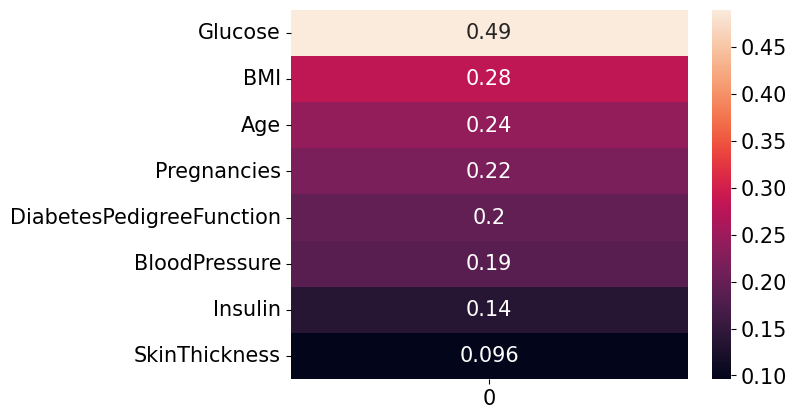

In [177]:
eda.corr_heatmap(df.columns[1:-1], df.columns[-1])